# Predicting Severity Of Traffic Accident In California

## Goal:

   ***Create a classification model that can predict the severity of the traffic accident given various factors***
    
   -  In severity scale
       - 1 < 2 < 3 < 4
    
    

**Plan:**
   - Acquire US Traffic Accident data from Kaggle
   - Filter data by state to get all of the record for state of California
   - Prepare
   - Explore
   - Model
   - Evaluate
   - Conclude

**Import all the necessary modules to begin**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# plt.rc('figure', figsize = (12,12))

lets import our data

In [2]:
#reading the data

df = pd.read_csv('ca.csv')

In [3]:
# check the shape of the data
df.shape

(816825, 50)

In [4]:
# taking a quick look at the data
df.head()

,Unnamed: 0,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,728,A-729,MapQuest,201.0,3,2016-06-21 10:34:40,2016-06-21 11:04:40,38.085300,-122.233017,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
1,729,A-730,MapQuest,201.0,3,2016-06-21 10:30:16,2016-06-21 11:16:39,37.631813,-122.084167,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
2,730,A-731,MapQuest,201.0,2,2016-06-21 10:49:14,2016-06-21 11:19:14,37.896564,-122.070717,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
3,731,A-732,MapQuest,201.0,3,2016-06-21 10:41:42,2016-06-21 11:11:42,37.334255,-122.032471,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
4,732,A-733,MapQuest,201.0,2,2016-06-21 10:16:26,2016-06-21 11:04:16,37.250729,-121.910713,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day


In [5]:
# dropping redundant column
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [6]:
# getting information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816825 entries, 0 to 816824
Data columns (total 49 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     816825 non-null  object 
 1   Source                 816825 non-null  object 
 2   TMC                    485943 non-null  float64
 3   Severity               816825 non-null  int64  
 4   Start_Time             816825 non-null  object 
 5   End_Time               816825 non-null  object 
 6   Start_Lat              816825 non-null  float64
 7   Start_Lng              816825 non-null  float64
 8   End_Lat                330882 non-null  float64
 9   End_Lng                330882 non-null  float64
 10  Distance(mi)           816825 non-null  float64
 11  Description            816825 non-null  object 
 12  Number                 175503 non-null  float64
 13  Street                 816825 non-null  object 
 14  Side                   816825 non-nu

In [7]:
# lets get some descriptive stats of the data
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,816825,816825,A-2673820,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Source,816825,3,MapQuest,445371,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TMC,485943,NaN,NaN,NaN,209.351,20.567,200,201,201,201,406
Severity,816825,NaN,NaN,NaN,2.29008,0.490771,1,2,2,3,4
Start_Time,816825,737043,2018-11-12 00:37:27,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
End_Time,816825,767047,2019-10-17 18:07:45,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Start_Lat,816825,NaN,NaN,NaN,35.5363,2.03396,32.5426,33.9605,34.168,37.6951,42.0054
Start_Lng,816825,NaN,NaN,NaN,-119.489,1.95157,-124.369,-121.652,-118.386,-117.927,-114.301
End_Lat,330882,NaN,NaN,NaN,35.53,2.0419,32.5425,33.9594,34.1681,37.6833,42.0321
End_Lng,330882,NaN,NaN,NaN,-119.453,1.94236,-124.215,-121.56,-118.38,-117.889,-114.301


**Takeaways:**
- The shape of the data is 
- There are few columns with missing values
- There are few columns that hold the bool data type, will have to convert them to numeric data type
- Convert column names to lower case


**Goal:**
- Use the data to determine the severity of the accident
- Explore if there is a correlation between time of the day or week of the day or month of the year and the liklihood of getting into an accident
- Explore relationship between weather condition and accident
- Explore relationship between states and accident


## Preparation

In [8]:
# lower case the column names
df.columns = [col.lower() for col in df.columns]

In [9]:
# lets check the percentage of the null values for data sets
(df.isnull().sum()/len(df)) * 100

id                        0.000000
source                    0.000000
tmc                      40.508310
severity                  0.000000
start_time                0.000000
end_time                  0.000000
start_lat                 0.000000
start_lng                 0.000000
end_lat                  59.491690
end_lng                  59.491690
distance(mi)              0.000000
description               0.000000
number                   78.514002
street                    0.000000
side                      0.000000
city                      0.000979
county                    0.000000
state                     0.000000
zipcode                   0.037585
country                   0.000000
timezone                  0.037585
airport_code              0.040155
weather_timestamp         1.534600
temperature(f)            2.403697
wind_chill(f)            58.432345
humidity(%)               2.572154
pressure(in)              1.809812
visibility(mi)            2.031525
wind_direction      

In [10]:
# function to drop the null columns
def dropping_nulls(df, columns, proportion_column):
    for col in columns:
        if (df[col].isnull().sum())/len(df) > proportion_column:
            df.drop(columns = [col], inplace = True)
    return df
    

In [11]:
# dropping nulls 
columns = df.columns
df = dropping_nulls(df, columns, 0.20)

In [12]:
# lets drop the remaining null observations
df = df.dropna()

In [13]:
# lets check the shape of the data
df.shape

(674669, 43)

In [14]:
# check data to see if there are any null left
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 674669 entries, 0 to 816824
Data columns (total 43 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     674669 non-null  object 
 1   source                 674669 non-null  object 
 2   severity               674669 non-null  int64  
 3   start_time             674669 non-null  object 
 4   end_time               674669 non-null  object 
 5   start_lat              674669 non-null  float64
 6   start_lng              674669 non-null  float64
 7   distance(mi)           674669 non-null  float64
 8   description            674669 non-null  object 
 9   street                 674669 non-null  object 
 10  side                   674669 non-null  object 
 11  city                   674669 non-null  object 
 12  county                 674669 non-null  object 
 13  state                  674669 non-null  object 
 14  zipcode                674669 non-nu

In [15]:
# converting the time to datetime type
df['start_time'] = pd.to_datetime(df.start_time)


# converting the end time to datetime type
df['end_time'] = pd.to_datetime(df.end_time)


# extract the duration of the traffic delay caused by the accident
df['duration'] = (df.end_time-df.start_time )/pd.Timedelta('1h')

In [16]:
# extract the day of the week and the month of the year

df['weekday'] = df['start_time'].apply(lambda x: x.weekday())
df['month'] = df['start_time'].dt.month

In [17]:
# lets look at the data again
df.head()



,id,source,severity,start_time,end_time,start_lat,start_lng,distance(mi),description,street,...,traffic_calming,traffic_signal,turning_loop,sunrise_sunset,civil_twilight,nautical_twilight,astronomical_twilight,duration,weekday,month
0,A-729,MapQuest,3,2016-06-21 10:34:40,2016-06-21 11:04:40,38.085300,-122.233017,0.0,Right hand shoulder blocked due to accident on...,Magazine St,...,False,False,False,Day,Day,Day,Day,0.500000,1,6
1,A-730,MapQuest,3,2016-06-21 10:30:16,2016-06-21 11:16:39,37.631813,-122.084167,0.0,Accident on I-880 Northbound at Exit 26 Tennys...,I-880 N,...,False,False,False,Day,Day,Day,Day,0.773056,1,6
2,A-731,MapQuest,2,2016-06-21 10:49:14,2016-06-21 11:19:14,37.896564,-122.070717,0.0,Right lane blocked due to accident on CA-24 We...,I-680 N,...,False,False,False,Day,Day,Day,Day,0.500000,1,6
3,A-732,MapQuest,3,2016-06-21 10:41:42,2016-06-21 11:11:42,37.334255,-122.032471,0.0,#4 &amp; HOV lane blocked due to accident on I...,N De Anza Blvd,...,False,False,False,Day,Day,Day,Day,0.500000,1,6
4,A-733,MapQuest,2,2016-06-21 10:16:26,2016-06-21 11:04:16,37.250729,-121.910713,0.0,Right hand shoulder blocked due to accident on...,Norman Y Mineta Hwy,...,False,False,False,Day,Day,Day,Day,0.797222,1,6


In [18]:
# converting the true and false to 1 and 0 respectively
def data_conversion(df):
    for col in df.columns:
        if df[col].dtype == bool:
            df[col] = df[col].astype(int)
    return df

df = data_conversion(df)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 674669 entries, 0 to 816824
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   id                     674669 non-null  object        
 1   source                 674669 non-null  object        
 2   severity               674669 non-null  int64         
 3   start_time             674669 non-null  datetime64[ns]
 4   end_time               674669 non-null  datetime64[ns]
 5   start_lat              674669 non-null  float64       
 6   start_lng              674669 non-null  float64       
 7   distance(mi)           674669 non-null  float64       
 8   description            674669 non-null  object        
 9   street                 674669 non-null  object        
 10  side                   674669 non-null  object        
 11  city                   674669 non-null  object        
 12  county                 674669 non-null  obje

In [20]:
# lets get the value count of our target variable
df['severity'].value_counts()

2    488263
3    174205
4      6614
1      5587
Name: severity, dtype: int64

- For convinient interpreteability, we will drop all the other ways that determines if its a day or not except the sunrise_sunset


In [21]:


cols_to_drop = ['id', 'source', 'description', 'street','city',
       'county', 'zipcode', 'country', 'timezone', 'airport_code',
       'weather_timestamp' , 'start_time', 'end_time', 'wind_direction', 'civil_twilight', 
               'nautical_twilight', 'astronomical_twilight', 'turning_loop']
df.drop(columns = cols_to_drop, inplace = True)

In [22]:
df.columns

Index(['severity', 'start_lat', 'start_lng', 'distance(mi)', 'side', 'state',
       'temperature(f)', 'humidity(%)', 'pressure(in)', 'visibility(mi)',
       'wind_speed(mph)', 'weather_condition', 'amenity', 'bump', 'crossing',
       'give_way', 'junction', 'no_exit', 'railway', 'roundabout', 'station',
       'stop', 'traffic_calming', 'traffic_signal', 'sunrise_sunset',
       'duration', 'weekday', 'month'],
      dtype='object')

In [23]:
# dropping the index because it held an empty value, not a nan, just empty
df.drop(index = 26348, inplace = True)

In [24]:
# encode column sunrise_sunset and side of the road 

dummies = pd.get_dummies(df.sunrise_sunset)
df = pd.concat([df, dummies], axis = 1).drop(columns = ['sunrise_sunset'])
dummies = pd.get_dummies(df.side)
df = pd.concat([df, dummies], axis = 1).drop(columns = ['side'])

In [25]:
# get the necessary imports to resample the data
from sklearn.model_selection import train_test_split
from sklearn.utils import resample



# Separate majority and minority classes
df_s1 = df[df['severity']==1]
df_s2 = df[df['severity']==2]
df_s3 = df[df['severity']==3]
df_s4 = df[df['severity']==4]

# lets get the count of each dataframe and select the count of the first column and then get the max count to get
# the count to upsample to
count = max(df_s1.count()[0], df_s2.count()[0], df_s3.count()[0], df_s4.count()[0])
print(f'the number to upsample to is: {count}' )

# here you can see the count
print(f'Severity level 1 count: {df_s1.count()[0]}')
print(f'Severity level 2 count: {df_s2.count()[0]}')
print(f'Severity level 3 count: {df_s3.count()[0]}')
print(f'Severity level 4 count: {df_s4.count()[0]}')
print()


# creating dataframes with equal number of target variable
df_s1 = resample(df_s1, replace=df_s1.count()[0]<count, n_samples=count, random_state=42)
df_s2 = resample(df_s2, replace=df_s2.count()[0]<count, n_samples=count, random_state=42)
df_s3 = resample(df_s3, replace=df_s3.count()[0]<count, n_samples=count, random_state=42)
df_s4 = resample(df_s4, replace=df_s4.count()[0]<count, n_samples=count, random_state=42)



# adding all of the dataframes together
df = pd.concat([df_s1, df_s2, df_s3, df_s4])

print('The severity level count post upsampling is: ')
print(f'{df.severity.value_counts()}')

the number to upsample to is: 488262
Severity level 1 count: 5587
Severity level 2 count: 488262
Severity level 3 count: 174205
Severity level 4 count: 6614

The severity level count post upsampling is: 
4    488262
3    488262
2    488262
1    488262
Name: severity, dtype: int64


In [26]:
# lets get the imports to split our data
from sklearn.model_selection import train_test_split



# lets split our data
train, validate = train_test_split(df, random_state = 123, test_size = .30)
test, validate = train_test_split(validate, random_state = 121, test_size = .50)

train.shape, test.shape, validate.shape

((1367133, 30), (292957, 30), (292958, 30))

## Exploration

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1367133 entries, 592206 to 203029
Data columns (total 30 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   severity           1367133 non-null  int64  
 1   start_lat          1367133 non-null  float64
 2   start_lng          1367133 non-null  float64
 3   distance(mi)       1367133 non-null  float64
 4   state              1367133 non-null  object 
 5   temperature(f)     1367133 non-null  float64
 6   humidity(%)        1367133 non-null  float64
 7   pressure(in)       1367133 non-null  float64
 8   visibility(mi)     1367133 non-null  float64
 9   wind_speed(mph)    1367133 non-null  float64
 10  weather_condition  1367133 non-null  object 
 11  amenity            1367133 non-null  int64  
 12  bump               1367133 non-null  int64  
 13  crossing           1367133 non-null  int64  
 14  give_way           1367133 non-null  int64  
 15  junction           1367133 n

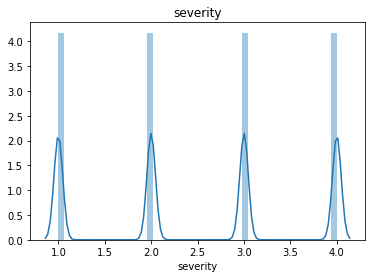

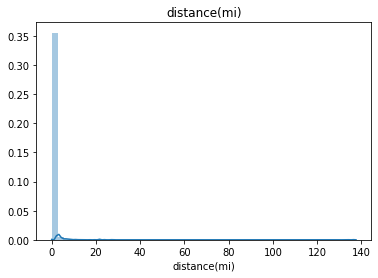

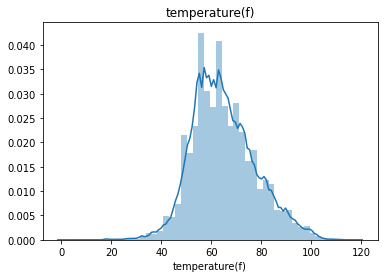

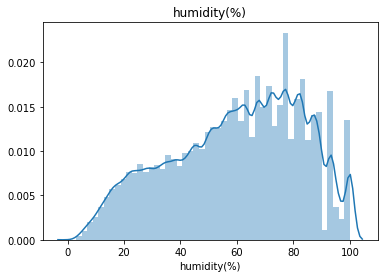

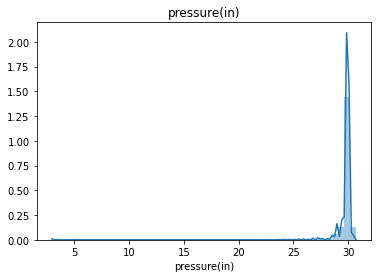

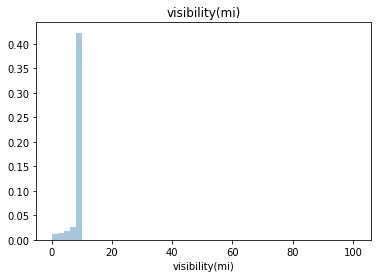

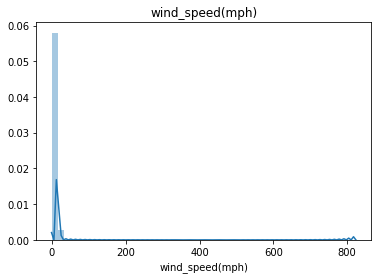

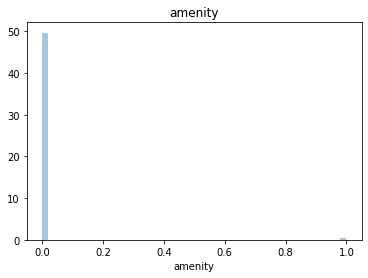

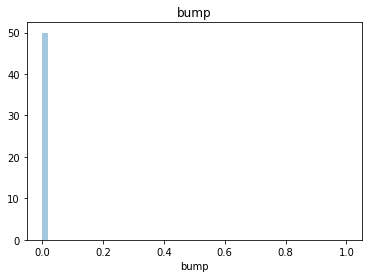

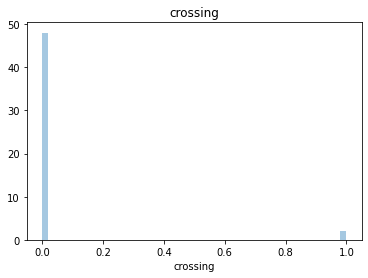

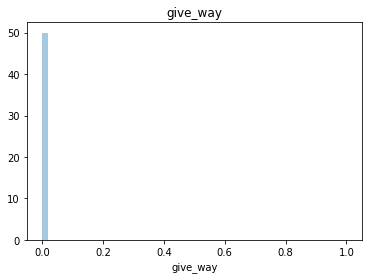

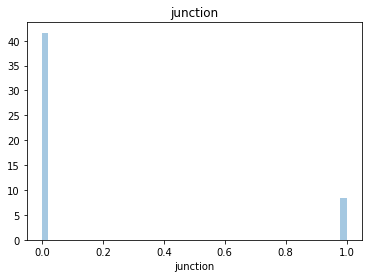

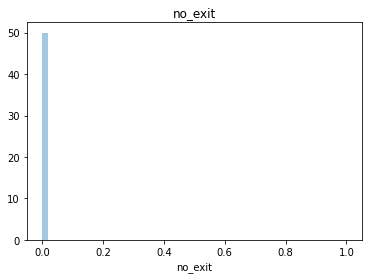

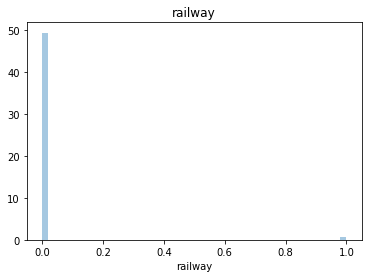

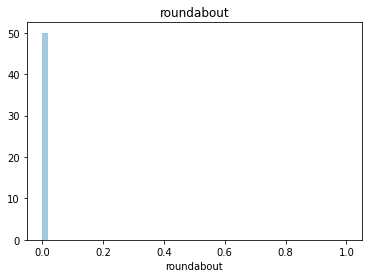

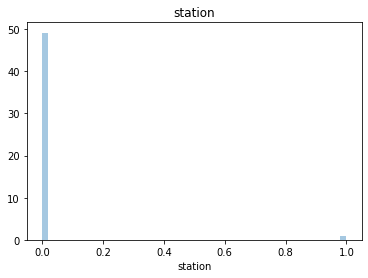

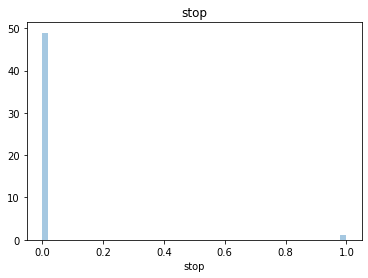

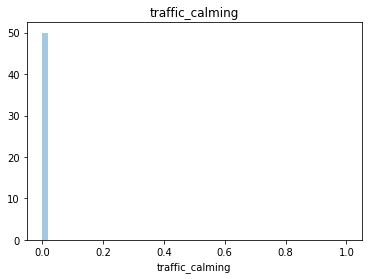

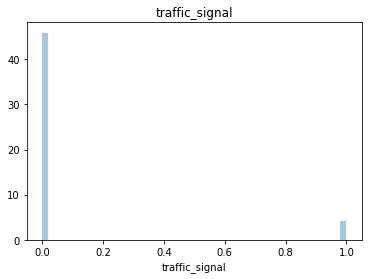

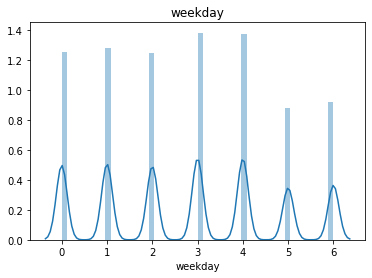

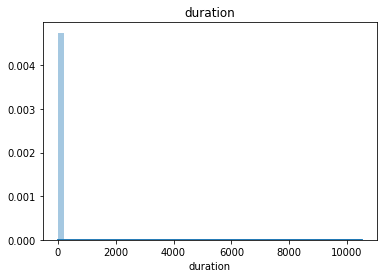

In [28]:
# lets check the distribution of the numeric columns in the dataframe

cols = ['severity', 'distance(mi)','temperature(f)', 
       'humidity(%)', 'pressure(in)', 'visibility(mi)', 'wind_speed(mph)','amenity', 'bump', 'crossing', 'give_way',
       'junction', 'no_exit', 'railway', 'roundabout', 'station', 'stop',
       'traffic_calming', 'traffic_signal', 'weekday', 'duration']

for col in cols:
    sns.distplot(train[col])
    plt.title(col)
    plt.show()

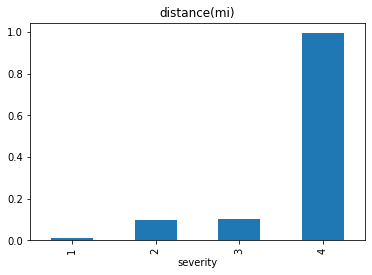

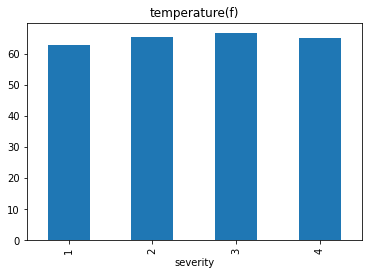

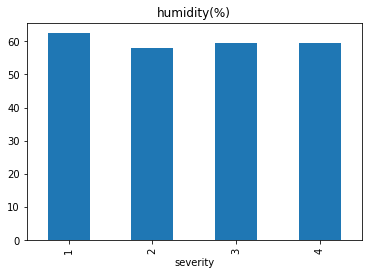

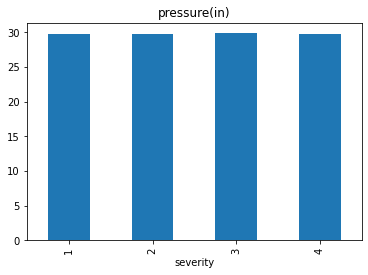

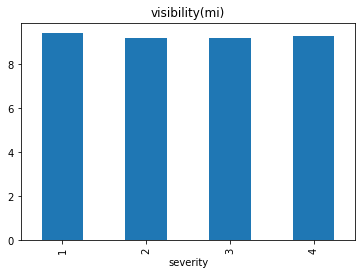

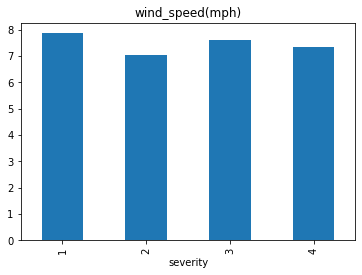

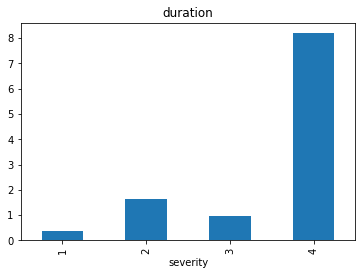

In [29]:
# lets plot the average of continuous variables against the severity

cont_variables = ['distance(mi)','temperature(f)', 'humidity(%)', 'pressure(in)', 
                  'visibility(mi)', 'wind_speed(mph)', 'duration']

for col in cont_variables:
    train.groupby('severity')[col].mean().plot(kind = 'bar')
    plt.title(col)
    plt.show()


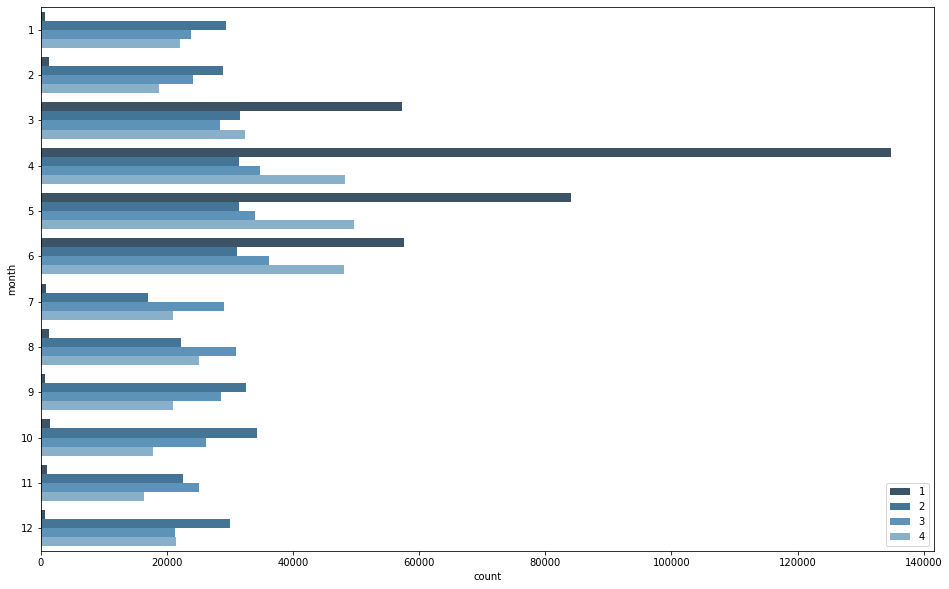

In [30]:
# Analysing the month & severity attribute

fig = plt.figure(figsize = (16, 10))
sns.countplot(y='month', data=train, hue='severity', palette='Blues_d')
plt.legend(loc='lower right')
plt.show()

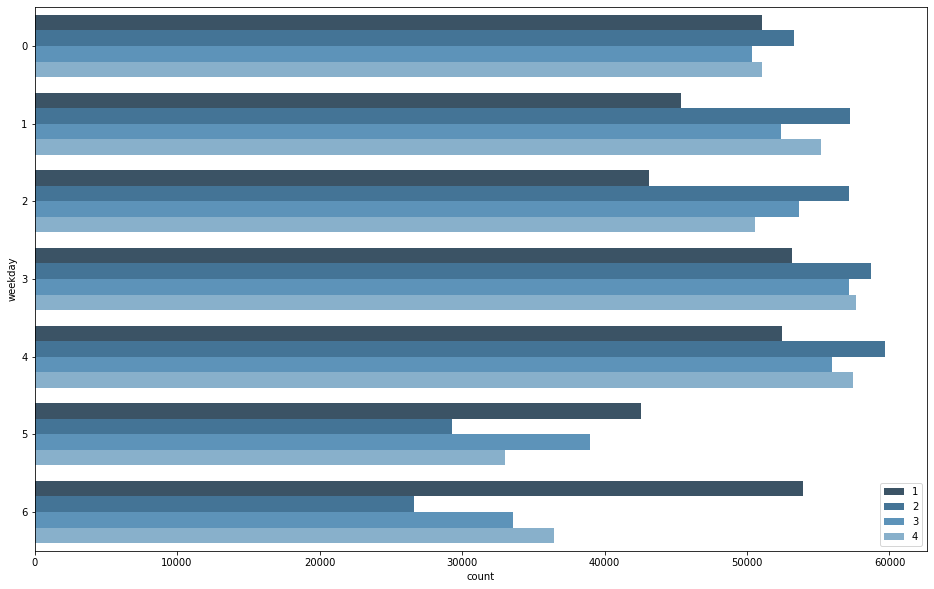

In [31]:
# Analysing the weekday & severity attribute

fig = plt.figure(figsize = (16, 10))
sns.countplot(y='weekday', data=train, hue='severity', palette='Blues_d')
plt.legend(loc='lower right')
plt.show()

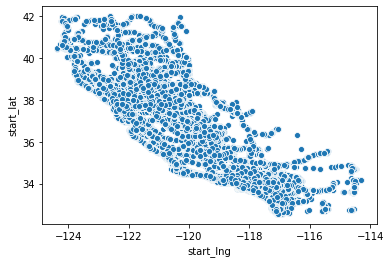

In [32]:
# lets plot the lat and long to see where they lie
sns.scatterplot(train.start_lng, train.start_lat)
plt.show()

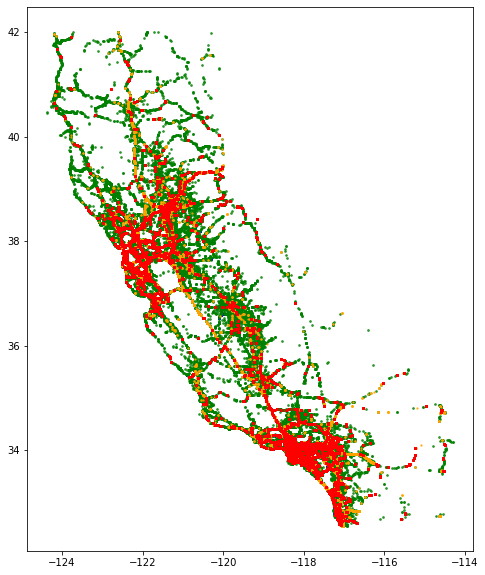

In [33]:
# lets plot the lat and long and by severity of the accident and give it a different color


fig, ax = plt.subplots(figsize = (8,10))
ax.scatter(train[train['severity']==1].start_lng, train[train['severity']==1].start_lat,  alpha= 0.7, c='blue', s=4)
ax.scatter(train[train['severity']==2].start_lng, train[train['severity']==2].start_lat,  alpha= 0.7, c='green', s=3)
ax.scatter(train[train['severity']==3].start_lng, train[train['severity']==3].start_lat,  alpha= 0.7, c='orange', s=2)
ax.scatter(train[train['severity']==4].start_lng, train[train['severity']==4].start_lat,  alpha= 0.7, c='red', s=1)


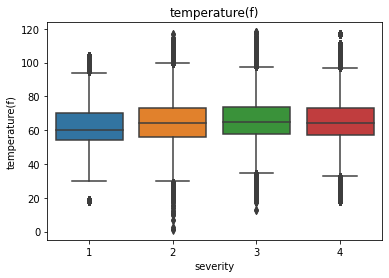

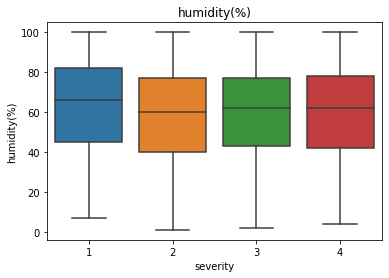

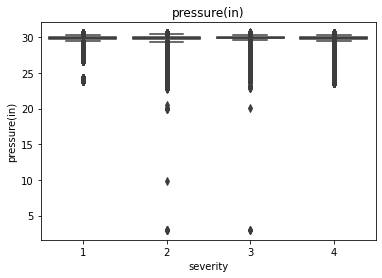

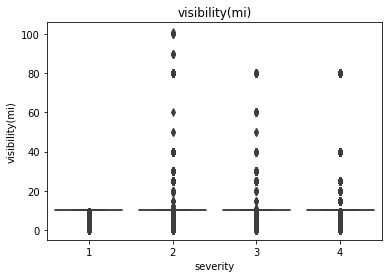

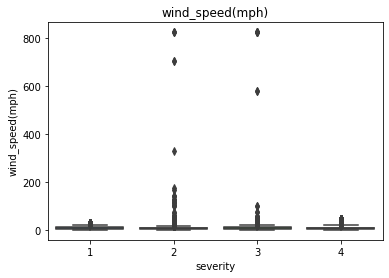

In [34]:
# lets group our variables into different groups
    # weather_conditions: holds all the variables that are weather related
    # road_conditions: holds all the variables that are road condition related
    # time_related: holds variables like the side of the road, day or night, day of the week, and month of the year

weather_conditions = ['temperature(f)',  'humidity(%)', 'pressure(in)',
       'visibility(mi)', 'wind_speed(mph)']


# lets check the distribution of these variables using boxplot

for col in weather_conditions:
    sns.boxplot(train.severity, train[col])
    plt.title(col)
    plt.show()
    

**lets see the scatter plot of these variables individually**

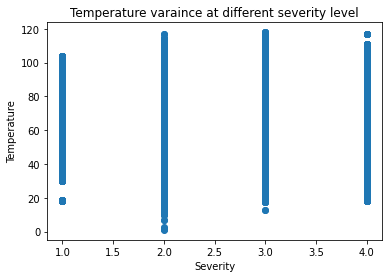

In [35]:
# scatter plot: temperature

plt.scatter(train.severity, train['temperature(f)'])
plt.title('Temperature varaince at different severity level')
plt.xlabel('Severity')
plt.ylabel('Temperature')
plt.show()

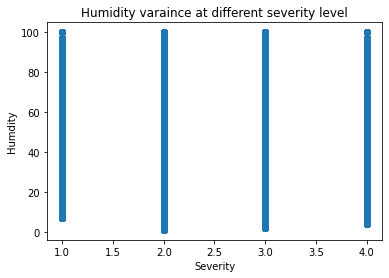

In [36]:
# scatter plot: humidity

plt.scatter(train.severity, train['humidity(%)'])
plt.title('Humidity varaince at different severity level')
plt.xlabel('Severity')
plt.ylabel('Humdity')
plt.show()

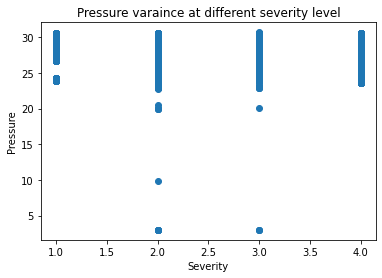

In [37]:
# scatter plot: pressure

plt.scatter(train.severity, train['pressure(in)'])
plt.title('Pressure varaince at different severity level')
plt.xlabel('Severity')
plt.ylabel('Pressure')
plt.show()

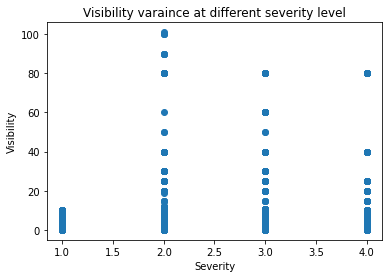

In [38]:
# scatter plot: visibility

plt.scatter(train.severity, train['visibility(mi)'])
plt.title('Visibility varaince at different severity level')
plt.xlabel('Severity')
plt.ylabel('Visibility')
plt.show()

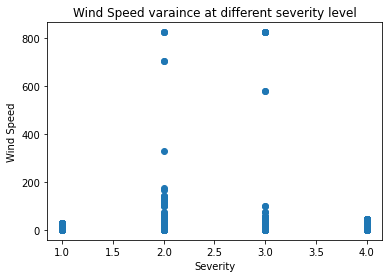

In [39]:
# scatter plot: wind speed

plt.scatter(train.severity, train['wind_speed(mph)'])
plt.title('Wind Speed varaince at different severity level')
plt.xlabel('Severity')
plt.ylabel('Wind Speed')
plt.show()

**Lets run some correlation tests to see if the weather conditions have correlation with the severity**

In [40]:
from math import sqrt

from scipy import stats

**checking assumptions to run ANOVA**

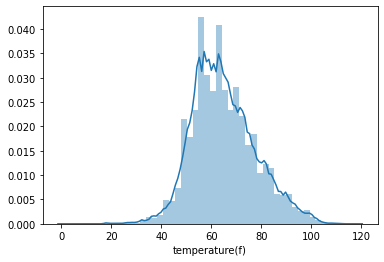

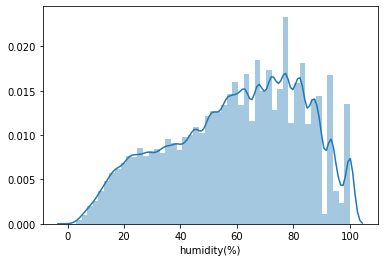

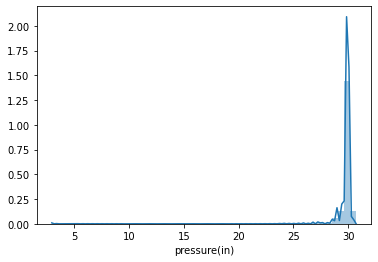

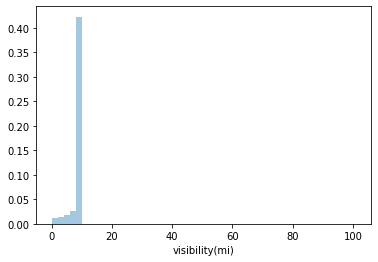

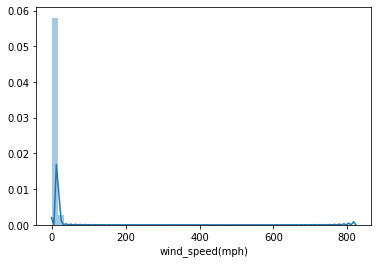

In [41]:
weather_conditions = ['temperature(f)', 'humidity(%)', 'pressure(in)',
       'visibility(mi)', 'wind_speed(mph)']

for col in weather_conditions:
    sns.distplot(train[col])
    plt.show()

In [42]:
for col in weather_conditions:
    print(train[col].std())
    print()

12.664230257493845

23.363150966607087

0.5520302460404602

2.1306546288205377

5.5338734245277506



**Results:**

- The assumption that the variables are normaly distributed failed
- The assumption that the standard deviation is equal amogst the population failed
- So, we will run KruskalWallace test

In [43]:
# Running Kruskal-Wallace Test

weather_conditions = ['temperature(f)',  'humidity(%)', 'pressure(in)',
       'visibility(mi)', 'wind_speed(mph)']

for col in weather_conditions:
    x1 = train[train.severity == 1][col]
    x2 = train[train.severity == 2][col]
    x3 = train[train.severity == 3][col]
    x4 = train[train.severity == 4][col]
    a = 0.05
    stat, p = stats.kruskal(x1,x2,x3,x4)
    print(f'Kruskal Statistic value for {col} is: {stat}')
    print(f'The p value is: {p}')
    print()
    if p < a:
        print('We Reject the null')
    else:
        print('We fail to reject the null')
    print()
    print()

Kruskal Statistic value for temperature(f) is: 25030.166461143286
The p value is: 0.0

We Reject the null


Kruskal Statistic value for humidity(%) is: 6445.875639375488
The p value is: 0.0

We Reject the null


Kruskal Statistic value for pressure(in) is: 17242.316473623607
The p value is: 0.0

We Reject the null


Kruskal Statistic value for visibility(mi) is: 6154.615350403972
The p value is: 0.0

We Reject the null


Kruskal Statistic value for wind_speed(mph) is: 6756.3039154892085
The p value is: 0.0

We Reject the null




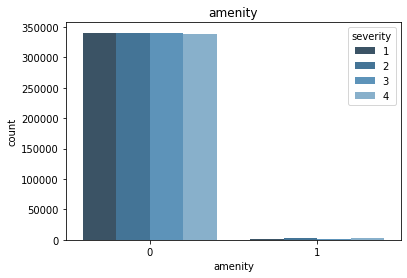

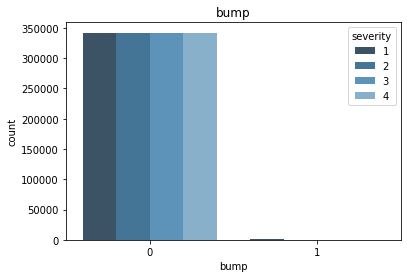

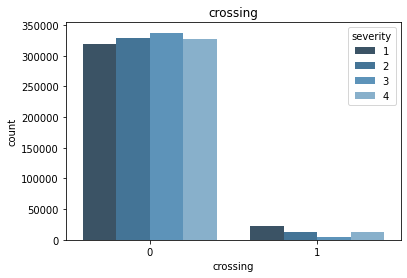

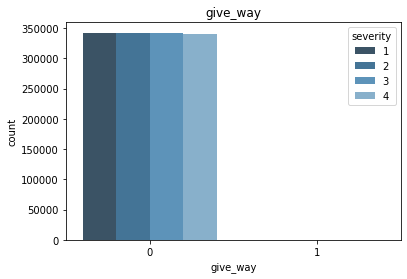

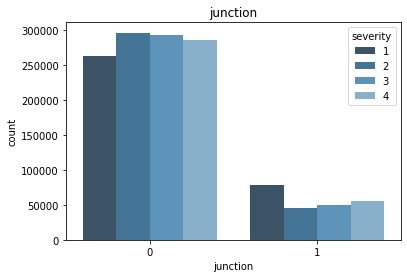

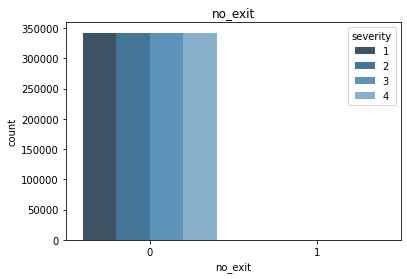

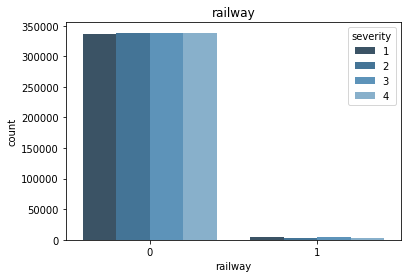

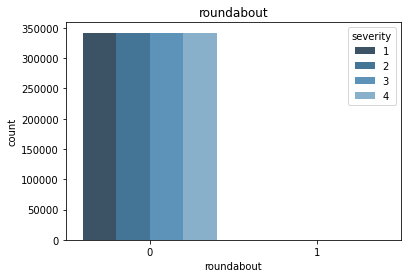

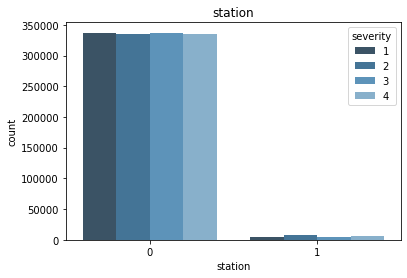

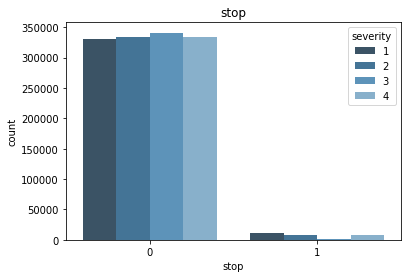

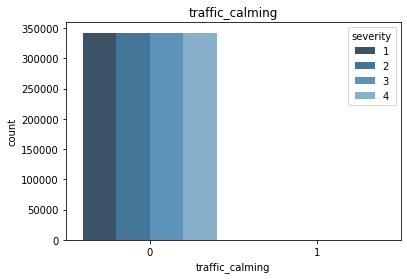

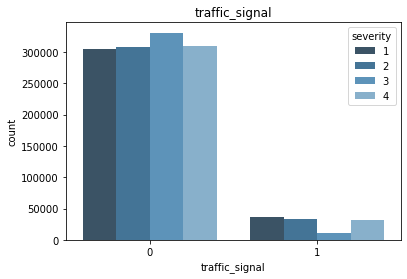

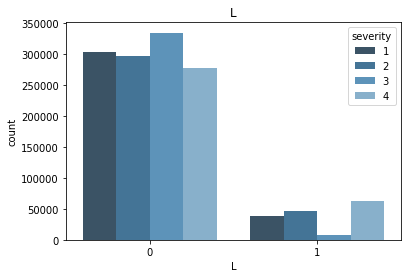

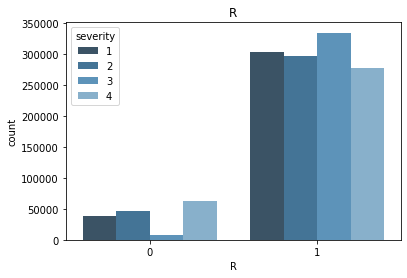

In [44]:
# lets plot road conditions  against the target variable

road_conditions = ['amenity', 'bump', 'crossing', 'give_way',
       'junction', 'no_exit', 'railway', 'roundabout', 'station', 'stop',
       'traffic_calming', 'traffic_signal', 'L',
       'R']
for col in road_conditions:
    sns.countplot(train[col], hue = train.severity, palette = 'Blues_d')
    plt.title(col)
    plt.show()

**Lets run through the Chi^2 test with the road conditions**

- Test whether the severity is dependent on the presence of road conditions

$H_0:$ The severity is indpendent of the presence of road conditions

$H_a:$ The severity of accidents is dependent on the presence of road conditions

In [45]:

road_conditions = ['amenity', 'bump', 'crossing', 'give_way',
       'junction', 'no_exit', 'railway', 'roundabout', 'station', 'stop',
       'traffic_calming', 'traffic_signal', 'L',
       'R']

for col in road_conditions:
    a = 0.05
    observed = pd.crosstab(train.severity, train[col])
    chi2, p, degf, expected = stats.chi2_contingency(observed)
    print(f'For {col} : ')
    print(f'The chi^2 value is: {chi2}')
    print(f'The P value is {p}')
    if p < a:
        print("The P value is low")
        print('So, we reject the null hypothesis')
        print()
    else:
        print('We fail to reject the null hypothesis')
        print()
    

For amenity : 
The chi^2 value is: 1320.6461916316864
The P value is 4.875116454055119e-286
The P value is low
So, we reject the null hypothesis

For bump : 
The chi^2 value is: 1183.17311423534
The P value is 3.281356966777327e-256
The P value is low
So, we reject the null hypothesis

For crossing : 
The chi^2 value is: 12400.65505216465
The P value is 0.0
The P value is low
So, we reject the null hypothesis

For give_way : 
The chi^2 value is: 359.2086080232259
The P value is 1.512374317222683e-77
The P value is low
So, we reject the null hypothesis

For junction : 
The chi^2 value is: 14134.931064711325
The P value is 0.0
The P value is low
So, we reject the null hypothesis

For no_exit : 
The chi^2 value is: 55.43146602323049
The P value is 5.554709559755609e-12
The P value is low
So, we reject the null hypothesis

For railway : 
The chi^2 value is: 278.4543656478621
The P value is 4.5737370308998495e-60
The P value is low
So, we reject the null hypothesis

For roundabout : 
The ch

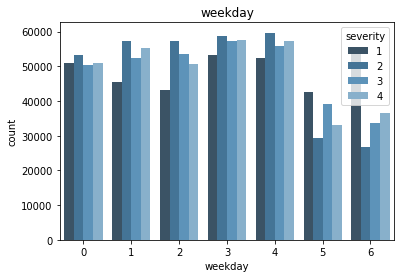

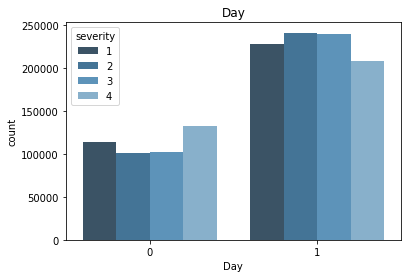

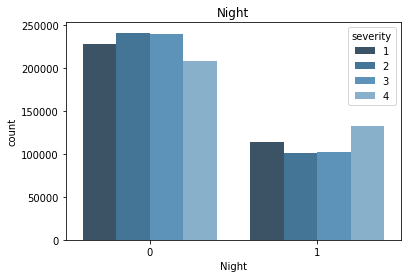

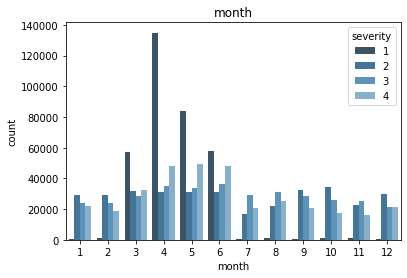

In [46]:
# lets plot the time conditions against the target variable
time_conditions = ['weekday', 'Day', 'Night',  'month']

for col in time_conditions:
    sns.countplot(train[col], hue = train.severity, palette = 'Blues_d')
    plt.title(col)
    plt.show()


In [47]:
# lets run a chi^2 test

time_conditions = ['weekday', 'Day', 'Night',  'month']

for col in time_conditions:
    a = 0.05
    observed = pd.crosstab(train.severity, train[col])
    chi2, p, degf, expected = stats.chi2_contingency(observed)
    print(f'For {col} : ')
    print(f'The chi^2 value is: {chi2}')
    print(f'The P value is {p}')
    if p < a:
        print("The P value is low")
        print('So, we reject the null hypothesis')
        print()
    else:
        print('We fail to reject the null hypothesis')
        print()
    

For weekday : 
The chi^2 value is: 18239.625048943977
The P value is 0.0
The P value is low
So, we reject the null hypothesis

For Day : 
The chi^2 value is: 8870.365782503057
The P value is 0.0
The P value is low
So, we reject the null hypothesis

For Night : 
The chi^2 value is: 8870.365782503057
The P value is 0.0
The P value is low
So, we reject the null hypothesis

For month : 
The chi^2 value is: 379673.0704640591
The P value is 0.0
The P value is low
So, we reject the null hypothesis



**Next we will try to use select k best to determine the top features to model on, but first lets scale our data**

In [48]:
from sklearn.feature_selection import SelectKBest, f_regression

from sklearn.preprocessing import MinMaxScaler


In [49]:
# lets create dataframe to scale by droping columns that we are not going to use

train_to_scale = train.drop(columns = ['severity', 'state','weather_condition',  'distance(mi)', 'duration'])
validate_to_scale = validate.drop(columns = ['severity', 'state','weather_condition',  'distance(mi)', 'duration'])
test_to_scale = test.drop(columns = ['severity', 'state','weather_condition',  'distance(mi)', 'duration'])

In [50]:
train_to_scale

,start_lat,start_lng,temperature(f),humidity(%),pressure(in),visibility(mi),wind_speed(mph),amenity,bump,crossing,...,station,stop,traffic_calming,traffic_signal,weekday,month,Day,Night,L,R
592206,38.235880,-122.101340,61.0,48.0,30.00,10.0,8.0,0,0,0,...,0,0,0,0,3,3,1,0,0,1
281103,34.027523,-118.274719,66.0,54.0,29.85,10.0,0.0,0,0,1,...,0,0,0,1,3,4,1,0,0,1
648059,33.972780,-117.332170,44.0,65.0,29.19,10.0,5.0,0,0,0,...,0,0,0,0,4,2,1,0,0,1
517640,38.711840,-121.078440,84.2,30.0,30.00,10.0,4.6,0,0,0,...,0,0,0,0,0,8,1,0,0,1
565234,34.069000,-118.463290,69.0,73.0,29.72,9.0,9.0,0,0,0,...,0,0,0,0,1,6,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809473,37.690530,-122.078050,71.0,57.0,29.79,10.0,15.0,0,0,0,...,0,0,0,0,4,5,1,0,0,1
449836,33.614765,-117.707458,72.0,55.0,30.01,10.0,6.9,0,0,0,...,0,0,0,0,2,11,1,0,0,1
595392,37.799440,-122.221400,54.0,77.0,30.09,10.0,12.0,0,0,0,...,0,0,0,0,1,3,1,0,0,1
603680,38.012140,-121.867800,67.0,39.0,29.99,10.0,6.0,0,0,0,...,0,0,0,0,1,4,1,0,0,1


In [51]:
# create a scaler object
scaler = MinMaxScaler()

# fit our scaler object to our train dataframe created to scale
scaler = scaler.fit(train_to_scale)

# transform our data

train_scaled = pd.DataFrame(scaler.transform(train_to_scale), 
                            columns = train_to_scale.columns, index = train_to_scale.index)

validate_scaled = pd.DataFrame(scaler.transform(validate_to_scale), 
                               columns = validate_to_scale.columns, index = validate_to_scale.index)

test_scaled = pd.DataFrame(scaler.transform(test_to_scale), columns = test_to_scale.columns, index = test_to_scale.index)

In [52]:
# getting our target variable
y_train = train.severity

In [53]:
# creating our selector object
f_selector = SelectKBest(f_regression, k=15)

# fitting our selector object
f_selector.fit(train_scaled, y_train)

# creating a mask
feature_mask = f_selector.get_support()


# getting our features
f_feature = train_scaled.iloc[:,feature_mask].columns.tolist()

# printing our features
f_feature

['start_lat',
 'start_lng',
 'temperature(f)',
 'humidity(%)',
 'pressure(in)',
 'crossing',
 'junction',
 'stop',
 'traffic_signal',
 'weekday',
 'month',
 'Day',
 'Night',
 'L',
 'R']

In [54]:
# getting x_train, y_train

x_train = train_scaled[['start_lat','start_lng','temperature(f)','humidity(%)','pressure(in)','crossing',
                         'junction','stop','traffic_signal','weekday','month','Day','Night','L','R']]
y_train = train.severity


# getting x_validate, y_validate
x_validate = validate_scaled[['start_lat','start_lng','temperature(f)','humidity(%)','pressure(in)','crossing',
                         'junction','stop','traffic_signal','weekday','month','Day','Night','L','R']]
y_validate = validate.severity


# getting x_test, y_test
x_test = test_scaled[['start_lat','start_lng','temperature(f)','humidity(%)','pressure(in)','crossing',
                         'junction','stop','traffic_signal','weekday','month','Day','Night','L','R']]
y_test = test.severity


## Modeling

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier

**Lets create baseline**

In [56]:
train.severity.value_counts()/len(train)

3    0.250265
2    0.250145
1    0.249874
4    0.249715
Name: severity, dtype: float64

**Model 1 - Stocastic Gradient Descent(SGD) Classifier**

In [57]:
# creating model object
sgd  = SGDClassifier(loss = 'squared_hinge', n_jobs = -1)

# fitting the model object
sgd = sgd.fit(x_train, y_train)

# predicting with the model object
y_pred = sgd.predict(x_train)

# printing the classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           1       0.55      0.28      0.37    341611
           2       0.27      0.49      0.35    341982
           3       0.39      0.53      0.45    342146
           4       0.36      0.12      0.18    341394

    accuracy                           0.35   1367133
   macro avg       0.39      0.35      0.34   1367133
weighted avg       0.39      0.35      0.34   1367133



**Model 2 - Ridge Classifier**

In [58]:
# creating model object
ridge  = RidgeClassifier(random_state = 123)

# fitting the model object
ridge = ridge.fit(x_train, y_train)

# predicting with the model object
y_pred = ridge.predict(x_train)

# printing the classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           1       0.49      0.94      0.64    341611
           2       0.44      0.15      0.22    341982
           3       0.44      0.56      0.49    342146
           4       0.48      0.22      0.30    341394

    accuracy                           0.47   1367133
   macro avg       0.46      0.47      0.42   1367133
weighted avg       0.46      0.47      0.42   1367133



**Model 3 - Logistic Regression**

In [59]:
# creating model object
logit = LogisticRegression(C=10, random_state=123)

# fitting the model object
logit = logit.fit(x_train, y_train)

# predicting with the model object
y_pred = logit.predict(x_train)

# printing the classification report
print(classification_report(y_train, y_pred))


              precision    recall  f1-score   support

           1       0.54      0.88      0.67    341611
           2       0.41      0.20      0.27    341982
           3       0.44      0.59      0.51    342146
           4       0.45      0.25      0.32    341394

    accuracy                           0.48   1367133
   macro avg       0.46      0.48      0.44   1367133
weighted avg       0.46      0.48      0.44   1367133



### Model 4 - With Random Forest

In [60]:
# creating the model
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=500,
                            max_depth=15, 
                            random_state=123)
# fitting the model
rf = rf.fit(x_train, y_train)

# predicting with the model
y_pred = rf.predict(x_train)

# printing the classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           1       0.72      0.99      0.83    341611
           2       0.81      0.53      0.64    341982
           3       0.61      0.73      0.66    342146
           4       0.91      0.71      0.80    341394

    accuracy                           0.74   1367133
   macro avg       0.76      0.74      0.73   1367133
weighted avg       0.76      0.74      0.73   1367133



### Model 5 - Decision Tree

In [61]:
# create a decision tree classifier
clf = DecisionTreeClassifier(max_depth = 10, random_state=0)

# fitting the model
clf = clf.fit(x_train, y_train)

# predicting with the model
y_pred = clf.predict(x_train)

# printing the classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           1       0.67      0.97      0.79    341611
           2       0.65      0.35      0.46    341982
           3       0.52      0.67      0.59    342146
           4       0.61      0.44      0.51    341394

    accuracy                           0.61   1367133
   macro avg       0.61      0.61      0.59   1367133
weighted avg       0.61      0.61      0.59   1367133



### Model 6 - With MLP Classifier
- MLP(Multi-layer Perceptron) is a supervised learning algorith.
- Trains using Backpropagation
   


In [62]:
# creating the classification object using MLP Classifier
mlp = MLPClassifier(random_state = 1, max_iter = 300)

# fitting the object
mlp = mlp.fit(x_train, y_train)

# predicting using the model 
y_pred = mlp.predict(x_train)

# printing the classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           1       0.70      0.95      0.81    341611
           2       0.51      0.39      0.44    341982
           3       0.50      0.64      0.56    342146
           4       0.58      0.35      0.44    341394

    accuracy                           0.58   1367133
   macro avg       0.57      0.58      0.56   1367133
weighted avg       0.57      0.58      0.56   1367133



### Model 5 with KNN

In [63]:
#creating model object
# knn = KNeighborsClassifier(n_neighbors = 10, weights = 'uniform', n_jobs = -1 )

# # fitting model object
# knn = knn.fit(x_train, y_train)

# # predicting with our model object
# y_pred = knn.predict(x_train)

# # printing classification_report
# print(classification_report(y_train, y_pred))

### All of the trained models beat the baseline accuracy, however, the 4 models out of 5 performed well. So, for lets validate these models with validate data set

**# validating with Random Forest**

In [64]:

y_pred_rf = rf.predict(x_validate)

In [65]:
print(classification_report(y_validate, y_pred_rf))

              precision    recall  f1-score   support

           1       0.72      0.99      0.83     73146
           2       0.79      0.51      0.62     73535
           3       0.60      0.72      0.65     73063
           4       0.90      0.71      0.79     73214

    accuracy                           0.73    292958
   macro avg       0.75      0.73      0.73    292958
weighted avg       0.75      0.73      0.73    292958



**#validating with Decision Trees**

In [66]:
# predicting
y_pred_dt = clf.predict(x_validate)

# printing classification report
print(classification_report(y_validate, y_pred_dt))

              precision    recall  f1-score   support

           1       0.67      0.97      0.79     73146
           2       0.65      0.35      0.46     73535
           3       0.52      0.67      0.58     73063
           4       0.61      0.44      0.51     73214

    accuracy                           0.61    292958
   macro avg       0.61      0.61      0.59    292958
weighted avg       0.61      0.61      0.59    292958



**# validating with mlp classifier**

In [67]:
# predicting
y_pred_mlp = mlp.predict(x_validate)

# printing classification report
print(classification_report(y_validate, y_pred_mlp))

              precision    recall  f1-score   support

           1       0.70      0.95      0.81     73146
           2       0.51      0.38      0.43     73535
           3       0.50      0.64      0.56     73063
           4       0.57      0.35      0.43     73214

    accuracy                           0.58    292958
   macro avg       0.57      0.58      0.56    292958
weighted avg       0.57      0.58      0.56    292958



**# validating with KNN classifier**

In [68]:
# predicting
# y_pred_knn = knn.predict(x_validate)

# # printing classification report
# print(classification_report(y_validate, y_pred_knn))

## Out of 4 models that were evaluated on validate dataset, Random Forest performed the best. So, we will use this model to run on out of sample(test) data

In [70]:
# predicting
y_pred_rf = rf.predict(x_test)

#printing classification report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           1       0.72      0.99      0.83     73505
           2       0.79      0.52      0.62     72745
           3       0.60      0.71      0.65     73053
           4       0.91      0.71      0.79     73654

    accuracy                           0.73    292957
   macro avg       0.75      0.73      0.73    292957
weighted avg       0.75      0.73      0.73    292957



### Conclusion
Out of all of the classification algorithm, RandomForest performed better than the others ones consistently on train, validate, and test data set. 

The final model accuracy is 73% on unseen data